In [2]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd
import numpy as np

In [3]:
G = nx.read_gpickle('../../data/processed/SP_multiGraph_Job_Edu_Level.gpickle')

In [4]:
print(nx.info(G))

Name: 
Type: MultiGraph
Number of nodes: 55492
Number of edges: 962038
Average degree:  34.6730


In [5]:
len(max(nx.connected_components(G), key=len))

55250

c:\users\paola\anaconda3\envs\cmdp\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


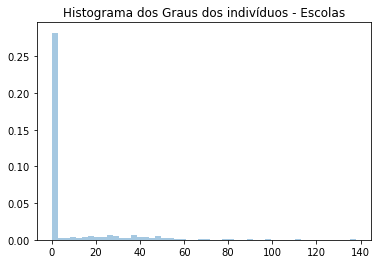

In [20]:
degree_school = {k: 0 for k in G.nodes}
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'school':
        degree_school[e1] +=1
        degree_school[e2] +=1
sns.distplot(list(degree_school.values()))
plt.title('Histograma dos Graus dos indivíduos - Escolas')
plt.show()

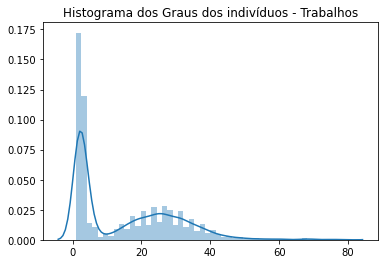

In [21]:
degree_school = {k: 0 for k in G.nodes}
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'work':
        degree_work[e1] +=1
        degree_work[e2] +=1
sns.distplot(list(degree_work.values()))
plt.title('Histograma dos Graus dos indivíduos - Trabalhos')
plt.show()

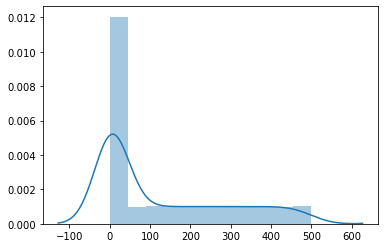

In [18]:
sns.distplot(nx.relaxed_caveman_graph(100, 5, 0.2).degree)

In [23]:
[v['job_level'] for n,v in G.nodes(data=True)]


{'work': 3.0, 'school': nan, 'home': 1.0, 'job_level': 2.0, 'education': 1.0, 'age': 59.0, 'private_healthcare': False, 'home_id': '00010001', 'home_x': 333743.0, 'home_y': 7394463.0, 'school_x': nan, 'school_y': nan, 'work_x': 333104.0, 'work_y': 7394476.0, 'criterio_br': 4.0}


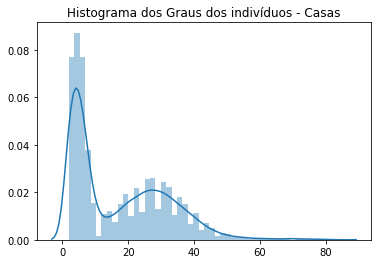

In [22]:
degree_school = {k: 0 for k in G.nodes}
for e1,e2,v in G.edges(data=True):
    if v['edge_type'] == 'home':
        degree_work[e1] +=1
        degree_work[e2] +=1
sns.distplot(list(degree_work.values()))
plt.title('Histograma dos Graus dos indivíduos - Casas')
plt.show()

In [7]:
edges = defaultdict(int)
for n,v in G.nodes(data=True):
    if not np.isnan(v['work']):
        edges[(int(v['home']), int(v['work']))] +=1
    if not np.isnan(v['school']):
        edges[(int(v['home']), int(v['school']))] +=1
    #edges((v['zone'], v['zone'])) += 2

In [8]:
SP = nx.DiGraph()

In [9]:
for e,w in edges.items():
    SP.add_edge(e[0], e[1], weight=w, distance=1/w)

In [10]:
print(nx.info(SP))

Name: 
Type: DiGraph
Number of nodes: 338
Number of edges: 14094
Average in degree:  41.6982
Average out degree:  41.6982


In [11]:
len(max(nx.weakly_connected_components(SP), key=len))

338

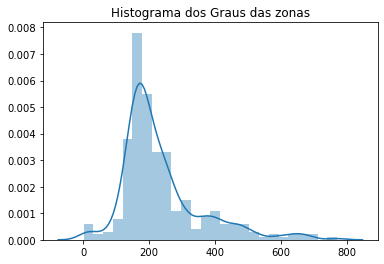

In [44]:
sns.distplot(list(weighted_degree_centrality(SP).values()))
plt.title('Histograma dos Graus das zonas')
plt.show()

In [12]:
distritos = pd.read_csv('distritos.csv', sep=';')
distritos = distritos[distritos['municipio'] == 'São Paulo']
distritos = distritos[['zona', 'nome', 'popu']].reset_index(drop=True).copy()
distritos['popu'] = pd.to_numeric(distritos['popu'], errors='coerce').fillna(0).astype('int')

In [13]:
def weighted_degree_centrality(G):
    return {k:v for k,v in dict(G.degree(weight='weight')).items()}

measures = [weighted_degree_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.pagerank_numpy, nx.eigenvector_centrality_numpy]
names = ['degree', 'betweenness', 'closeness', 'pagerank', 'eigenvector']

for m,n in zip(measures, names):
    print(n)
    if n in ['betweenness', 'pagerank', 'eigenvector']:
        measure_dict = m(SP, weight='weight')
    elif n in ['closeness']:
        measure_dict = m(SP, distance='distance')
    else:
        measure_dict = m(SP)
    distritos[n] = distritos['zona'].map(measure_dict).rank(pct=True)

distritos['average'] = distritos[names].mean(axis=1)
distritos = distritos.sort_values('average', ascending=False).dropna()

degree
betweenness
closeness
pagerank
eigenvector


In [14]:
distritos.drop('zona', axis=1).set_index('nome').style.background_gradient(cmap=sns.cm.rocket_r)